In [177]:
# Imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()

In [104]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)

In [105]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
bos['PRICE'] = boston.target

In [107]:
# Checking missing values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [108]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [109]:
bos.corr() # Some correlated features are present 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [110]:
y = bos['PRICE']
X = bos.drop(columns = ['PRICE'])

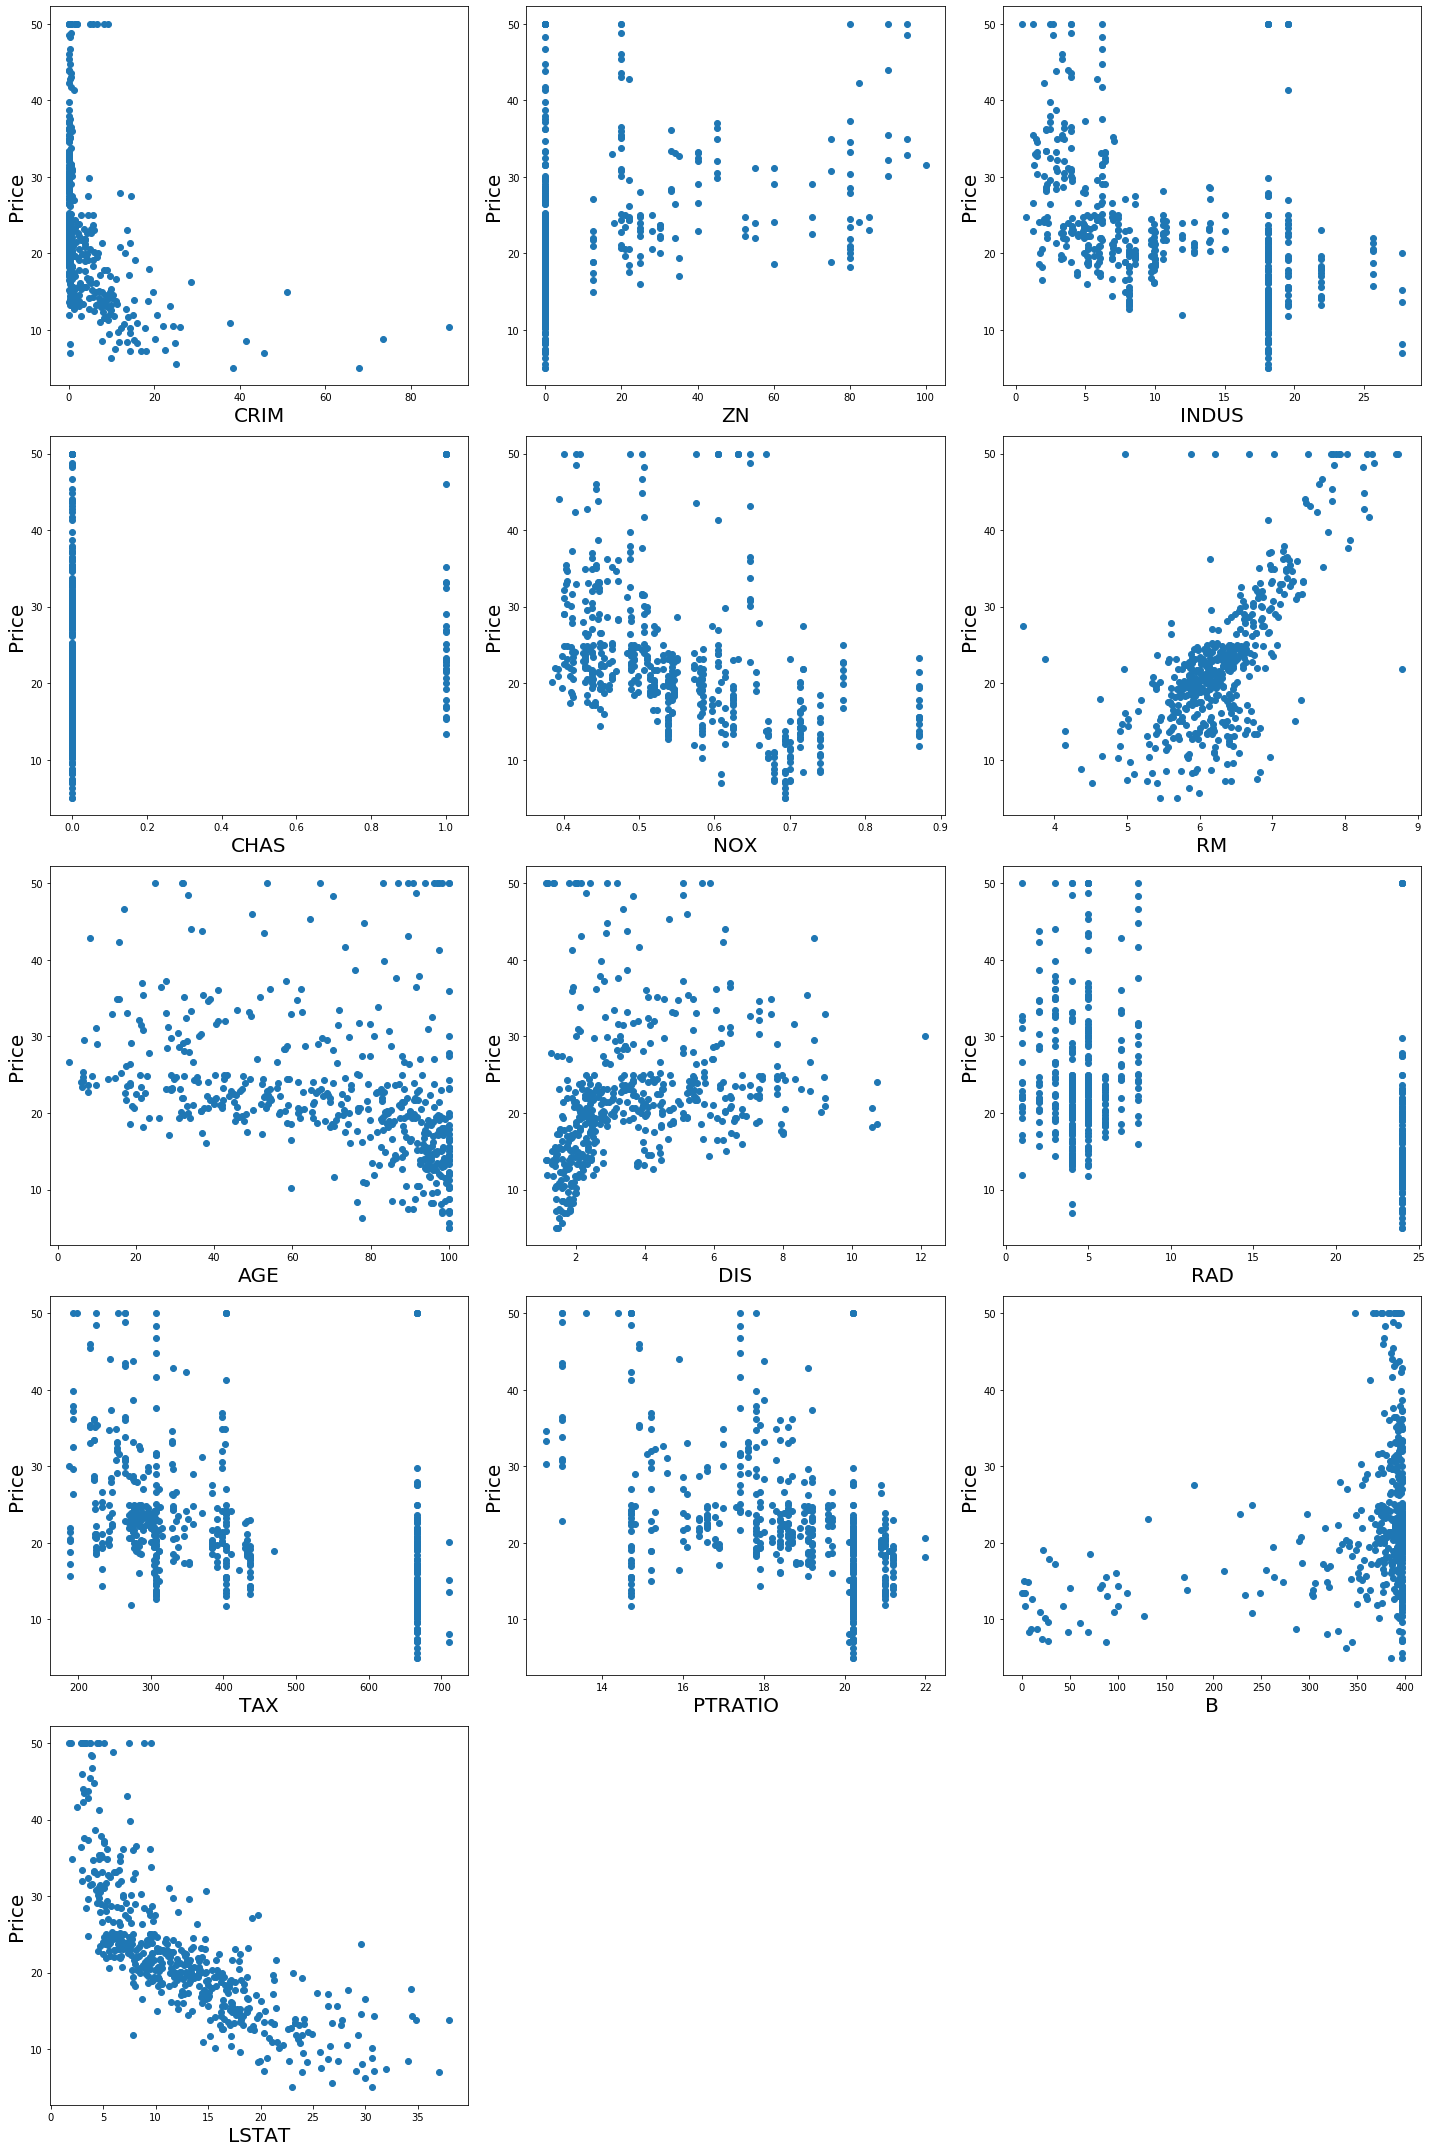

In [111]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Price', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [123]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [124]:
# Scaling input
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [125]:
X_scaled_train.shape, X_scaled_test.shape

((404, 13), (102, 13))

In [126]:
lr = LinearRegression()

In [129]:
lr.fit(X_scaled_train, y_train)

LinearRegression()

In [130]:
y_train_pred = lr.predict(X_scaled_train)
y_test_pred = lr.predict(X_scaled_test)

In [133]:
from sklearn.metrics import r2_score, mean_squared_error

In [144]:
print(lr.score(X_scaled_train, y_train))
print(lr.score(X_scaled_test, y_test))

0.7463022809475017
0.7128868225330548


In [135]:
# Model is overfit
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

20.93091087977919
26.4062956672361


## Assumptions Checking

## Multi Collinearity

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()

VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["Features"] = X.columns

# Gathering and printing total cases of possible or definite multicollinearity
possible_multicollinearity = sum([1 for vif in VIF["VIF"] if vif > 10])
definite_multicollinearity = sum([1 for vif in VIF["VIF"] if vif > 100])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
print()

if definite_multicollinearity == 0:
    if possible_multicollinearity == 0:
        print('Assumption satisfied')
    else:
        print('Assumption possibly satisfied')
        print()
        print('Coefficient interpretability may be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

else:
    print('Assumption not satisfied')
    print()
    print('Coefficient interpretability will be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')


10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [175]:
# Some variables are highly correlated so dropping them as they violate assumption
high_corr = list(vif[vif['VIF'] > 10]['Features'].values)
high_corr

['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

## Normality of residuals

Assumption : The error terms are normally distributed 

p-value from the test - below 0.05 generally means non-normal: 7.665322967402367e-21
Residuals are not normally distributed


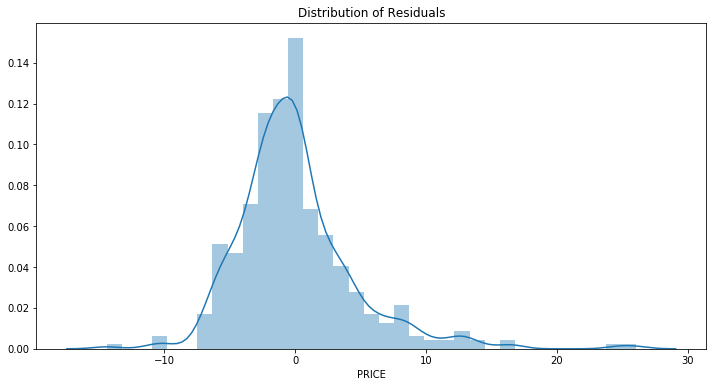


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [170]:
from statsmodels.stats.diagnostic import normal_ad
print('Assumption : The error terms are normally distributed', '\n')
p_value = normal_ad(y_train - y_train_pred)[1]

print('p-value from the test - below 0.05 generally means non-normal:', p_value)
p_value_thresh = 0.05
# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(y_train - y_train_pred)
plt.show()


print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')

## Autocorrelation of residuals

In [155]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(y_train-y_train_pred)

print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2 < is positive autocorrelation')
print('> 2 to 4 is negative autocorrelation')
print('-------------------------------------')

if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2 < is positive autocorrelation
> 2 to 4 is negative autocorrelation
-------------------------------------
Little to no autocorrelation 

Assumption satisfied


## Homoscedasticity of error terms

Assumption : Homoscedasticity of Error Terms 

Residuals should have relative constant variance


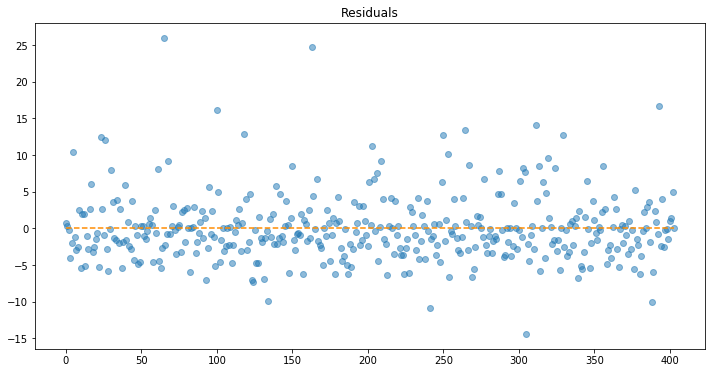

In [174]:
print('Assumption : Homoscedasticity of Error Terms', '\n')    
print('Residuals should have relative constant variance')

# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x = np.arange(X_scaled_train.shape[0]), y = y_train-y_train_pred, alpha=0.5)
plt.plot(np.repeat(0, X_scaled_train.shape[0]), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show()

In [178]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X, y)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [179]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00858123049896144

In [180]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_scaled_train, y_train)

Lasso(alpha=0.00858123049896144)

In [183]:
y_train_pred = lasso_reg.predict(X_scaled_train)
y_test_pred = lasso_reg.predict(X_scaled_test)

In [184]:
print(lasso_reg.score(X_scaled_train, y_train))
print(lasso_reg.score(X_scaled_test, y_test))

0.7462402743725892
0.7127123064590685


In [188]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))

ridgecv = RidgeCV(alphas = alphas, cv=10, normalize = True)
ridgecv.fit(X, y)

RidgeCV(alphas=array([2.64081049, 3.35565512, 4.61536858, 4.59219816, 7.92085374,
       2.6078249 , 6.95016727, 1.17008162, 0.5347257 , 4.76012821,
       7.35246045, 0.12629616, 8.95004515, 9.76900841, 7.08139917,
       2.85164311, 2.468397  , 1.09094873, 9.77491099, 1.59365525,
       8.76076626, 7.16980937, 9.89048239, 5.9764819 , 8.8957515 ,
       7.38570461, 2.31397611, 7.05194455, 4.60396196, 0.31967176,
       5.12011887, 1.15631344, 8.96045851, 5.10534022, 8.83017614,
       4.81304953, 4.218847  , 2.26281659, 2.53250746, 4.84619264,
       9.00243334, 1.76381735, 4.99586855, 1.13420567, 4.42914554,
       0.68781757, 7.13188764, 0.8726641 , 6.62733222, 7.548281  ]),
        cv=10, normalize=True)

In [193]:
ridgecv.alpha_

0.31967176485670934

In [194]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_scaled_train, y_train)

Ridge(alpha=0.31967176485670934)

In [195]:
y_train_pred = ridge_model.predict(X_scaled_train)
y_test_pred = ridge_model.predict(X_scaled_test)

In [196]:
print(ridge_model.score(X_scaled_train, y_train))
print(ridge_model.score(X_scaled_test, y_test))

0.7463003832578957
0.7129078478172179
